# 1. Реализовать модуль генерации данных
Реализовать на языке Python класс, один из методов которого будет создавать изображение и описание фигур, находящихся на этом изображении. Сгенерированное изображение должно быть размером 640х480 пикселей и представляет собой однотонный фон случайного цвета, на котором размещен прямоугольник случайного размера (без выхода за границы изображения) со стороной от 150 до 250 пикселей случайного цвета, отличного от цвета фона, повернутого на случайный угол от 0 до 89 градусов.  

Выход метода класса:  
1)	сгенерированное изображение;  
2)	параметры описывающего прямоугольника (координаты x, y верхнего левого угла, ширина (w) и высота (h));  
3)	координаты четырех углов сгенерированного прямоугольника.


Импорт библиотек

In [6]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

Класс, создающий прямоугольники

In [3]:
class object1:
    def ran1(self):
        self.img = np.zeros((480, 640, 3), np.uint8)
        self.img[:] = (random.randrange(0, 255), random.randrange(0, 255), random.randrange(0, 255))
        width = random.randrange(100, 250)
        height = random.randrange(100, 250)
        diam = np.sqrt(width ** 2 + height ** 2)

        x1 = random.randrange(int(diam / 2 - width / 2), int(self.img.shape[1] - (diam / 2 - width / 2) - width))
        x2 = x1 + width
        y1 = random.randrange(int((diam / 2 - height / 2)), int(self.img.shape[0] - (diam / 2 - height / 2) - height))
        y2 = y1 + height

        points = np.array([[x1, y1], [x2, y1], [x2, y2], [x1, y2]])

        ANGLE = np.deg2rad(random.randrange(0, 89))
        c_x, c_y = np.mean(points, axis=0)
        points = np.array([[c_x + np.cos(ANGLE) * (px - c_x) - np.sin(ANGLE) * (py - c_y),
                            c_y + np.sin(ANGLE) * (px - c_x) + np.cos(ANGLE) * (py - c_y)]
                           for px, py in points]).astype(int)

        self.points = points
        self.describe = np.array([points[3][0], points[0][1], points[1][0] - points[3][0], points[2][1] - points[0][1]])
        self.img = cv2.drawContours(self.img, [points], 0,
                               (random.randrange(0, 255), random.randrange(0, 255), random.randrange(0, 255)), -1)

Создание экземпляра

In [4]:
image = object1()
image.ran1()

Визуализация прямоугольника

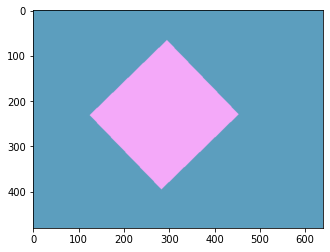

In [8]:
fig, ax = plt.subplots()
ax.imshow(cv2.resize(image.img, dsize=(640, 480), interpolation=cv2.INTER_CUBIC))
plt.show()

Координаты описывающего прямоугольника

In [9]:
print(f'Описывающий прямоугольник \n x = {image.describe[0]} \n y = {image.describe[1]} \n '
      f'w = {image.describe[2]} \n h = {image.describe[3]}')

Описывающий прямоугольник 
 x = 125 
 y = 66 
 w = 328 
 h = 328


Координаты углов

In [10]:
print(f'Координаты углов \n x1, y1 = {image.points[3]} \n x2, y2 = {image.points[0]} \n '
      f'x3, y3 = {image.points[1]} \n x4, y4 = {image.points[2]}')

Координаты углов 
 x1, y1 = [125 231] 
 x2, y2 = [295  66] 
 x3, y3 = [453 229] 
 x4, y4 = [283 394]
